In [81]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [82]:
pd.set_option('display.float_format', '{:.10f}'.format)

ANOVA Table:
                 sum_sq            df             F       PR(>F)
group    310.0000000000  2.0000000000 20.6666666667 0.0001297463
Residual  90.0000000000 12.0000000000           NaN          NaN
存在显著差异，进行Tukey检验
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      7.000     0.004     2.379    11.621
 (0 - 2)     11.000     0.000     6.379    15.621
 (1 - 0)     -7.000     0.004   -11.621    -2.379
 (1 - 2)      4.000     0.093    -0.621     8.621
 (2 - 0)    -11.000     0.000   -15.621    -6.379
 (2 - 1)     -4.000     0.093    -8.621     0.621

Statistics: [[  0.   7.  11.]
 [ -7.   0.   4.]
 [-11.  -4.   0.]]
P-values: [[1.00000000e+00 4.30732782e-03 1.00456261e-04]
 [4.30732782e-03 1.00000000e+00 9.28751843e-02]
 [1.00456261e-04 9.28751843e-02 1.00000000e+00]]
Confidence Intervals (Low): <bound method TukeyHSDResult.confidence_interval of <scipy.stats._hypotests.TukeyHSDResult object at 0x129

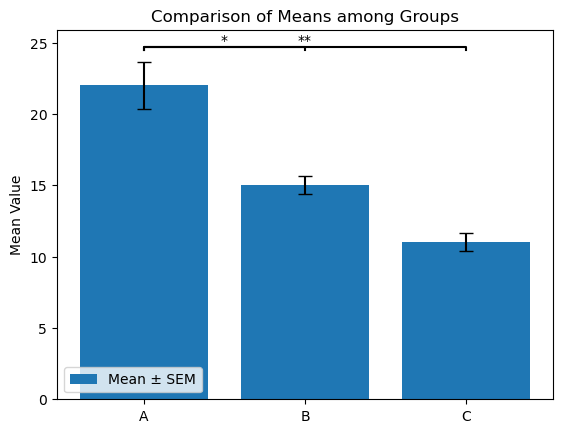

In [83]:
# 数据
#A = [20, 22, 29, 21, 18]
#B = [15, 14, 16, 13, 17]
#C = [10, 12, 11, 9, 13]

A = np.array([20, 22, 29, 21, 18])  # 替换为你的数据
B = np.array([15, 14, 16, 13, 17])  # 替换为你的数据
C = np.array([10, 12, 11, 9, 13]) 


# 将数据组合成一个列表
data = [A, B, C]
# 将组标签组合成一个列表
groups = ['A', 'B', 'C']

# 将数据转换为 DataFrame
df = pd.DataFrame({
    'value': np.concatenate([A, B, C]),
    'group': np.repeat(groups, [len(A), len(B), len(C)])
})

# 使用 statsmodels 进行单因素方差分析
model = ols('value ~ group', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # typ=2 表示使用 Type II 平方和

# 输出 ANOVA 表格
print("ANOVA Table:")
print(anova_table)

# 提取 F 值和 p 值
F = anova_table['F']['group']
p = anova_table['PR(>F)']['group']

# 判断是否存在显著差异
if p < 0.05:
    print("存在显著差异，进行Tukey检验")
    # 第二步：Tukey检验
    tukey_result = stats.tukey_hsd(A, B, C)
    print(tukey_result)

  
    print("Statistics:", tukey_result.statistic)
    print("P-values:", tukey_result.pvalue)
    print("Confidence Intervals (Low):", tukey_result.confidence_interval)


else:
    print("不存在显著差异")

# 绘制柱状图
means = [np.mean(x) for x in data]
errors = [np.std(x) / np.sqrt(len(x)) for x in data]
x = np.arange(len(groups))

plt.bar(x, means, yerr=errors, capsize=5, label='Mean ± SEM')
plt.xticks(x, groups)

# 标记显著性差异
if p < 0.05:
    # 提取组间比较的结果
    group_indices = list(range(len(groups)))
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            # 提取Tukey检验的p值
            pval = tukey_result.pvalue[i, j]
            if pval < 0.05:
                # 计算标记位置
                x1, x2 = i, j
                y = max(means[x1], means[x2]) + max(errors[x1], errors[x2]) + 1
                plt.plot([x1, x1, x2, x2], [y - 0.2, y, y, y - 0.2], lw=1.5, color='black')
                plt.text((x1 + x2) * 0.5, y, '*' if pval > 0.001 else '**', ha='center', va='bottom', color='black')

plt.ylabel('Mean Value')
plt.title('Comparison of Means among Groups')
plt.legend()
plt.show()

In [61]:

print(dir(tukey_result))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_ci', '_ci_cl', '_nobs', '_ntreatments', '_stand_err', 'confidence_interval', 'pvalue', 'statistic']
